<a href="https://colab.research.google.com/github/MoffatKirui/MoffatCoreW2/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_Moffat_Kirui_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

In [32]:
#Determine how to predict which individuals are most likely to have or use a bank account.

### b) Defining the Metric for Success

coming up with a solution that predict individuals who are likely to have a bank account basing on predictor variables

### c) Understanding the context

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design

* loading provided dataset
performing data cleaning
* Finding and dealing with outliers, anomalies, and missing data within the dataset.
* Performing of univariate, bivariate and multivariate analysis recording of observations.
* Implementing the solution .
* Challenge your solution.

### e) Data Relevance

A complete description of the provided dataset is found in the link below.
* Variable Definitions: [link](http://bit.ly/VariableDefinitions )

## 2. Reading the Data

In [33]:
# Loading the Data from the source i.e. csv
#import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
url = "http://bit.ly/FinancialDataset"
findata = pd.read_csv(url)

## 3. Checking the Data

In [34]:
# Determining the no. of records in our dataset
#
findata.shape

(23524, 13)

In [35]:
# Previewing the top of our dataset
#
findata.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [36]:
# Previewing the bottom of our dataset
# 
findata.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [37]:
# Checking whether each column has an appropriate datatype
#
findata.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. External Data Source Validation

The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

* FinAccess Kenya 2018.  [[Link]](https://fsdkenya.org/publication/finaccess2019/)
* Finscope Rwanda 2016.  [[Link]](http://www.statistics.gov.rw/publication/finscope-rwanda-2016)
* Finscope Tanzania 2017.  [[Link]](http://www.fsdt.or.tz/finscope/)
* Finscope Uganda 2018. [[Link]](http://fsduganda.or.ug/finscope-2018-survey-report/)

## 5. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Household size Boxplot')

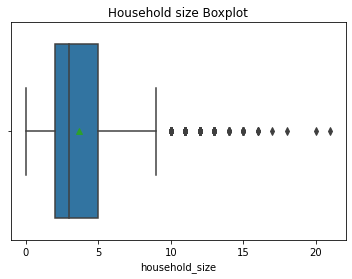

In [38]:
# Checking for Outliers
#
sns.boxplot(findata.household_size, showmeans=True)
plt.title('Household size Boxplot')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age Boxplot')

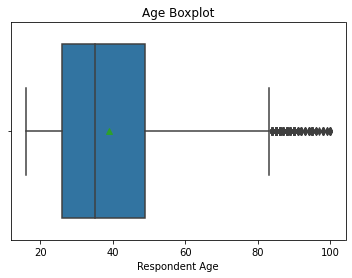

In [39]:
sns.boxplot(findata['Respondent Age'], showmeans=True)
plt.title('Age Boxplot')

In [40]:
#identifying missing data
#
findata.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [41]:
# Dealing with the Missing Data
#dropping records with null values in the 'Has a Bank account' column as it is our main point of focus
findata.dropna(inplace=True)
findata.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [42]:
# More data cleaning procedures
findata.drop(['country','uniqueid','year'],axis=1,inplace=True)

In [43]:
#changing column names to upper case and placing underscore to make the column names be more presentable
findata.columns = findata.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

## 6. Exploratory Analysis

### Univariate Analysis

In [44]:
# Ploting the univariate summaries and recording our observations
#
findata.describe(include='all')

,HAS_A_BANK_ACCOUNT,TYPE_OF_LOCATION,CELL_PHONE_ACCESS,HOUSEHOLD_SIZE,RESPONDENT_AGE,GENDER_OF_RESPONDENT,THE_RELATHIP_WITH_HEAD,MARITAL_STATUS,LEVEL_OF_EDUCUATION,TYPE_OF_JOB
count,23343,23343,23343,23343.000000,23343.000000,23343,23343,23343,23343,23343
unique,2,2,2,NaN,NaN,2,6,5,7,10
top,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,20046,14264,17334,NaN,NaN,13767,12730,10700,12689,6361
mean,NaN,NaN,NaN,3.688643,38.805509,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.281184,16.519803,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [45]:
#mode for the household size
findata.HOUSEHOLD_SIZE.mode()

0    2.0
dtype: float64

In [46]:
#mode for respondent age
findata.RESPONDENT_AGE.mode()

0    30.0
dtype: float64

In [47]:
print('Age Variance=',findata.RESPONDENT_AGE.var())
print('Age range=',findata.RESPONDENT_AGE.max()-findata.RESPONDENT_AGE.min())
print('Age IQR=', findata.RESPONDENT_AGE.quantile(0.75)-findata.RESPONDENT_AGE.quantile(0.25))


Age Variance= 272.90390761391353
Age range= 84.0
Age IQR= 23.0


In [48]:
print('household size variance=',findata.HOUSEHOLD_SIZE.var())
print('household size range=',findata.HOUSEHOLD_SIZE.max()-findata.HOUSEHOLD_SIZE.min())
print('househod size IQR=', findata.HOUSEHOLD_SIZE.quantile(0.75)-findata.HOUSEHOLD_SIZE.quantile(0.25))


household size variance= 5.20379827489179
household size range= 21.0
househod size IQR= 3.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


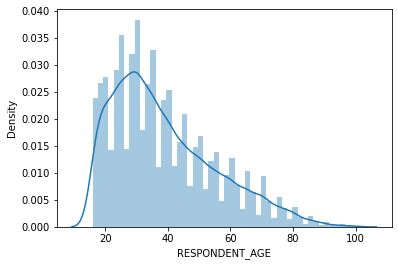

In [49]:
sns.distplot(findata.RESPONDENT_AGE)

In [50]:
findata.RESPONDENT_AGE.skew()

0.840661747532081

In [51]:
findata.RESPONDENT_AGE.kurt()

0.09844652254807196

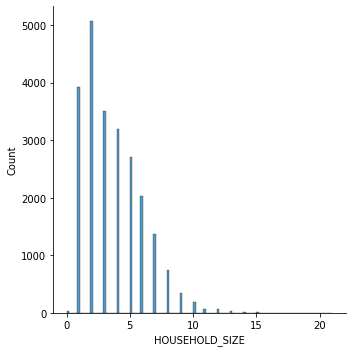

In [52]:
sns.displot(findata.HOUSEHOLD_SIZE)

In [53]:
findata.HOUSEHOLD_SIZE.skew()

0.9741086837897069

In [54]:
findata.HOUSEHOLD_SIZE.kurt()

1.1538690689335573

#### Bar charts

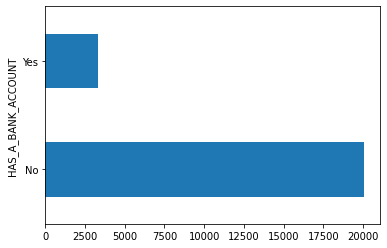

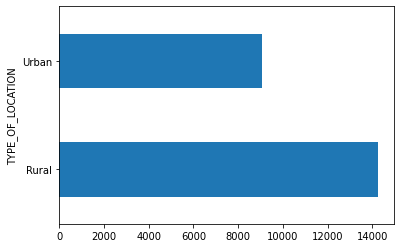

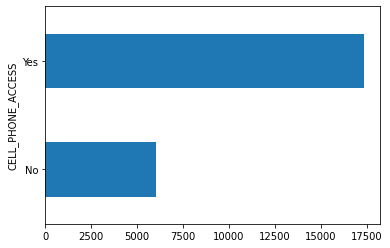

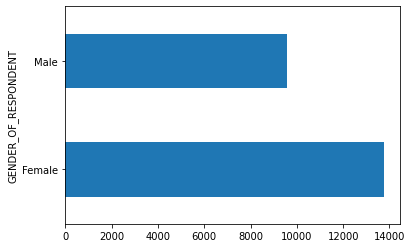

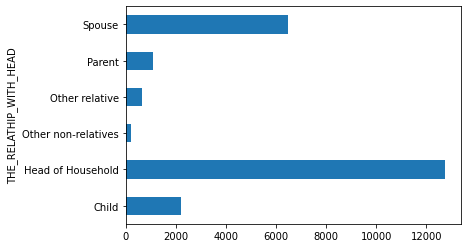

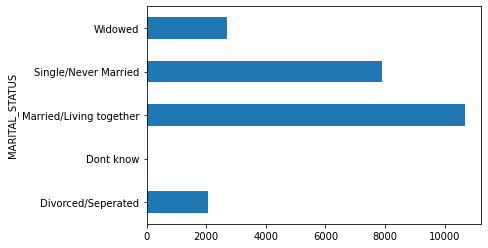

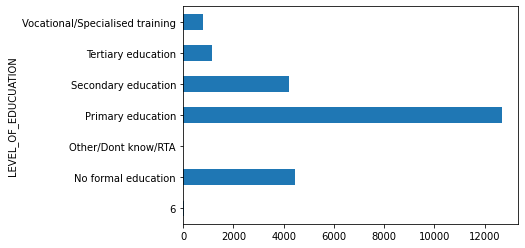

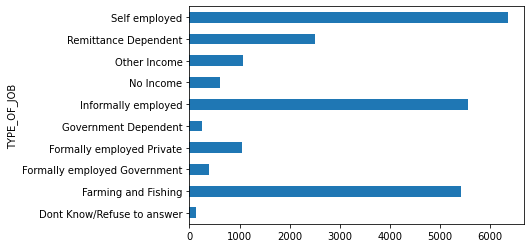

In [60]:
#fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(4,2, figsize=(20, 10))
#fig.suptitle('Bar charts')
findata.groupby('HAS_A_BANK_ACCOUNT')['HAS_A_BANK_ACCOUNT'].count().plot.barh()
plt.show()

findata.groupby('TYPE_OF_LOCATION')['TYPE_OF_LOCATION'].count().plot.barh()
plt.show()

findata.groupby('CELL_PHONE_ACCESS')['CELL_PHONE_ACCESS'].count().plot.barh()
plt.show()

findata.groupby('GENDER_OF_RESPONDENT')['GENDER_OF_RESPONDENT'].count().plot.barh()
plt.show()

findata.groupby('THE_RELATHIP_WITH_HEAD')['THE_RELATHIP_WITH_HEAD'].count().plot.barh()
plt.show()

findata.groupby('MARITAL_STATUS')['MARITAL_STATUS'].count().plot.barh()
plt.show()

findata.groupby('LEVEL_OF_EDUCUATION')['LEVEL_OF_EDUCUATION'].count().plot.barh()
plt.show()

findata.groupby('TYPE_OF_JOB')['TYPE_OF_JOB'].count().plot.barh()
plt.show()

### Bivariate analysis

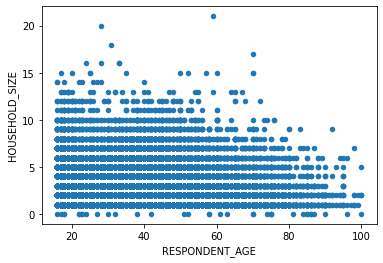

In [56]:
findata.plot(x='RESPONDENT_AGE',y='HOUSEHOLD_SIZE',kind= 'scatter')

In [57]:
pearson_coeff = findata["RESPONDENT_AGE"].corr(findata["HOUSEHOLD_SIZE"], method="pearson") 
print(pearson_coeff)

-0.11970919507762415


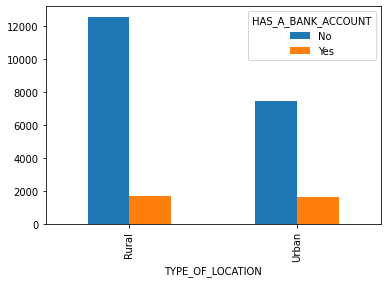

In [58]:
findata.groupby(['TYPE_OF_LOCATION','HAS_A_BANK_ACCOUNT'])['HAS_A_BANK_ACCOUNT'].count().unstack().plot.bar()

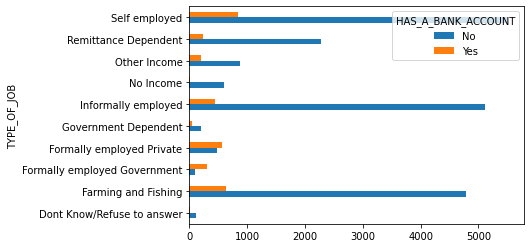

In [61]:
findata.groupby(['TYPE_OF_JOB','HAS_A_BANK_ACCOUNT'])['HAS_A_BANK_ACCOUNT'].count().unstack().plot.barh()

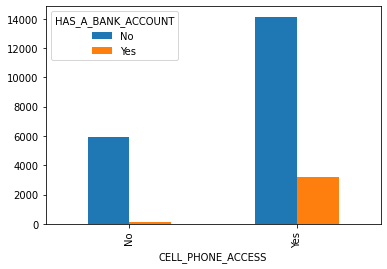

In [62]:
findata.groupby(['CELL_PHONE_ACCESS','HAS_A_BANK_ACCOUNT'])['HAS_A_BANK_ACCOUNT'].count().unstack().plot.bar()

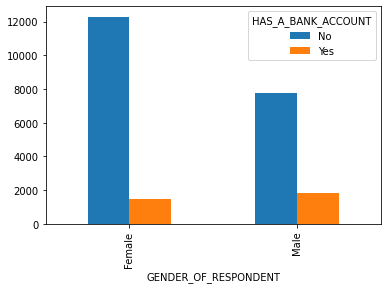

In [63]:
findata.groupby(['GENDER_OF_RESPONDENT','HAS_A_BANK_ACCOUNT'])['HAS_A_BANK_ACCOUNT'].count().unstack().plot.bar()

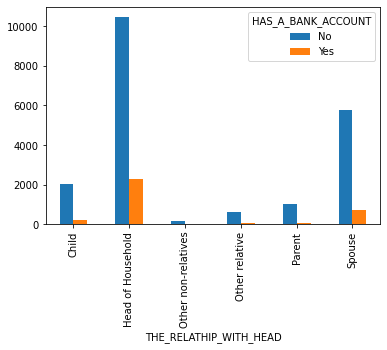

In [64]:
findata.groupby(['THE_RELATHIP_WITH_HEAD','HAS_A_BANK_ACCOUNT'])['HAS_A_BANK_ACCOUNT'].count().unstack().plot.bar()

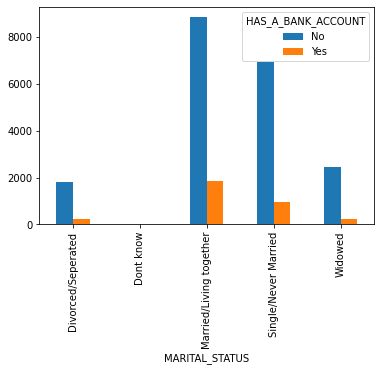

In [65]:
findata.groupby(['MARITAL_STATUS','HAS_A_BANK_ACCOUNT'])['HAS_A_BANK_ACCOUNT'].count().unstack().plot.bar()

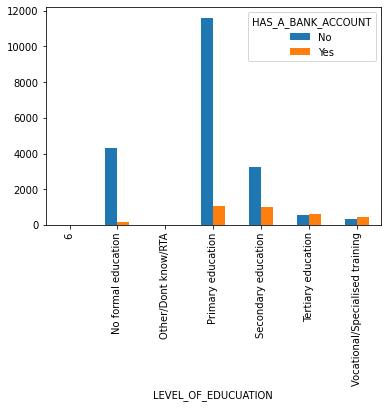

In [68]:
findata.groupby(['LEVEL_OF_EDUCUATION','HAS_A_BANK_ACCOUNT'])['HAS_A_BANK_ACCOUNT'].count().unstack().plot.bar()

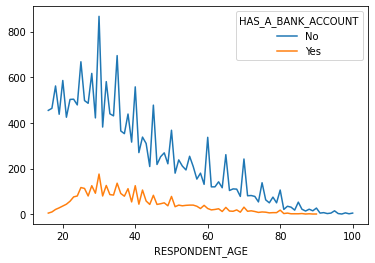

In [67]:
findata.groupby(['RESPONDENT_AGE','HAS_A_BANK_ACCOUNT'])['HAS_A_BANK_ACCOUNT'].count().unstack().plot.line()

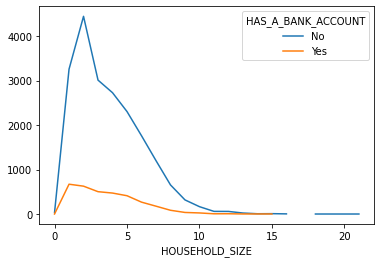

In [66]:
findata.groupby(['HOUSEHOLD_SIZE','HAS_A_BANK_ACCOUNT'])['HAS_A_BANK_ACCOUNT'].count().unstack().plot.line()

### Multivariate Analysis

#### label encoding

In [73]:
#label encoding data to binary
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
findata['GENDER_OF_RESPONDENT']= label.fit_transform(findata['GENDER_OF_RESPONDENT'])
findata['HAS_A_BANK_ACCOUNT']= label.fit_transform(findata['HAS_A_BANK_ACCOUNT'])
findata['CELL_PHONE_ACCESS']= label.fit_transform(findata['CELL_PHONE_ACCESS'])
findata['TYPE_OF_LOCATION']= label.fit_transform(findata['TYPE_OF_LOCATION'])

In [77]:
#one hot encoding columns with more than two categories
k=pd.get_dummies(findata.iloc[:,6:],prefix=['THE_RELATHIP_WITH_HEAD','MARITAL_STATUS','LEVEL_OF_EDUCUATION','TYPE_OF_JOB'])

In [80]:
findata.drop(['THE_RELATHIP_WITH_HEAD','MARITAL_STATUS','LEVEL_OF_EDUCUATION','TYPE_OF_JOB'],axis=1,inplace=True)					

In [82]:
#concatinating the one hot encoded dataframe to the initial dataframe
t=[findata,k]
j=pd.concat(t,axis=1)

In [83]:
j.head()

,HAS_A_BANK_ACCOUNT,TYPE_OF_LOCATION,CELL_PHONE_ACCESS,HOUSEHOLD_SIZE,RESPONDENT_AGE,GENDER_OF_RESPONDENT,THE_RELATHIP_WITH_HEAD_Child,THE_RELATHIP_WITH_HEAD_Head of Household,THE_RELATHIP_WITH_HEAD_Other non-relatives,THE_RELATHIP_WITH_HEAD_Other relative,THE_RELATHIP_WITH_HEAD_Parent,THE_RELATHIP_WITH_HEAD_Spouse,MARITAL_STATUS_Divorced/Seperated,MARITAL_STATUS_Dont know,MARITAL_STATUS_Married/Living together,MARITAL_STATUS_Single/Never Married,MARITAL_STATUS_Widowed,LEVEL_OF_EDUCUATION_6,LEVEL_OF_EDUCUATION_No formal education,LEVEL_OF_EDUCUATION_Other/Dont know/RTA,LEVEL_OF_EDUCUATION_Primary education,LEVEL_OF_EDUCUATION_Secondary education,LEVEL_OF_EDUCUATION_Tertiary education,LEVEL_OF_EDUCUATION_Vocational/Specialised training,TYPE_OF_JOB_Dont Know/Refuse to answer,TYPE_OF_JOB_Farming and Fishing,TYPE_OF_JOB_Formally employed Government,TYPE_OF_JOB_Formally employed Private,TYPE_OF_JOB_Government Dependent,TYPE_OF_JOB_Informally employed,TYPE_OF_JOB_No Income,TYPE_OF_JOB_Other Income,TYPE_OF_JOB_Remittance Dependent,TYPE_OF_JOB_Self employed
0,1,0,1,3.0,24.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,5.0,70.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1,1,5.0,26.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,1,5.0,34.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,8.0,26.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


#### PCA

In [86]:
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
X = j.drop('HAS_A_BANK_ACCOUNT', 1)
y = j['HAS_A_BANK_ACCOUNT']

In [87]:
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [88]:
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [89]:
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# Let's take a look at the following code. In the code above, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [90]:
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.63949726e-02, 7.80828089e-02, 6.10606010e-02, 5.85961370e-02,
       4.93238580e-02, 4.52827455e-02, 4.02336142e-02, 3.78749994e-02,
       3.38341500e-02, 3.28451540e-02, 3.21501158e-02, 3.11863035e-02,
       3.08700096e-02, 3.07443084e-02, 3.02206270e-02, 2.99652979e-02,
       2.98920074e-02, 2.95657975e-02, 2.92534967e-02, 2.88248973e-02,
       2.87889288e-02, 2.43447990e-02, 2.30626817e-02, 2.29169028e-02,
       1.86911747e-02, 1.84331298e-02, 1.43252683e-02, 1.33612084e-02,
       9.87400494e-03, 8.58480821e-32, 1.18604705e-32, 2.47285034e-33,
       2.14964344e-33])

In [91]:
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [92]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4000    8]
 [ 591   70]]
Accuracy 0.8717070036410366


## Challenging the solution

#### LDA

In [93]:
# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [94]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a LDA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [95]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3959   49]
 [ 500  161]]
Accuracy 0.882415934889698


LDA with an accuracy of 88% has a better performance in predicting the category than PCA which had 87%

## Follow-up questions

#### Did we have the right data?

In [ ]:
#yes we had the right data since it contained information that allow us to make prediction with a relatively high accuracy.

#### Do we need other data?

In [ ]:
#Additional data for example containing details of annual incomes could help improve on the accuracy of our prediction

#### Did we have the right question?

In [ ]:
Yes. because access to bank accounts has been regarded as an indicator of financial inclusion thus implementing a solution to predict the likelihood of an individual having a bank account seems right.